In [2]:
import pandas as pd

file_path = "telecom_customer_churn_data.xlsx" 
df = pd.read_excel(file_path)
df.head()


,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,0
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,1
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,1
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584663,0,9,83.102242,0.000000,16,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop customer_id since it's just an identifier
df_model = df.drop(columns=['customer_id'])

# Separate features and target
X = df_model.drop(columns=['churned'])
y = df_model['churned']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[22  0]
 [ 8  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
y.value_counts(normalize=True)


churned
0    0.746667
1    0.253333
Name: proportion, dtype: float64

In [6]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [7]:
from sklearn.metrics import roc_auc_score, confusion_matrix

print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


ROC AUC Score: 0.24431818181818182


In [8]:
df.head()

,customer_id,call_duration_last_month,num_complaints,recharge_frequency,avg_recharge_amount,internet_usage_gb,days_since_last_login,churned
0,CUST0001,349.671415,2,6,10.000000,18.861890,58,0
1,CUST0002,286.173570,0,1,91.952108,8.008133,45,1
2,CUST0003,364.768854,0,8,84.462632,11.250952,22,1
3,CUST0004,452.302986,1,9,126.784761,14.028676,31,0
4,CUST0005,276.584663,0,9,83.102242,0.000000,16,1


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest with class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
 [[21  1]
 [ 8  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.00      0.00      0.00         8

    accuracy                           0.70        30
   macro avg       0.36      0.48      0.41        30
weighted avg       0.53      0.70      0.60        30

ROC AUC Score: 0.40909090909090906


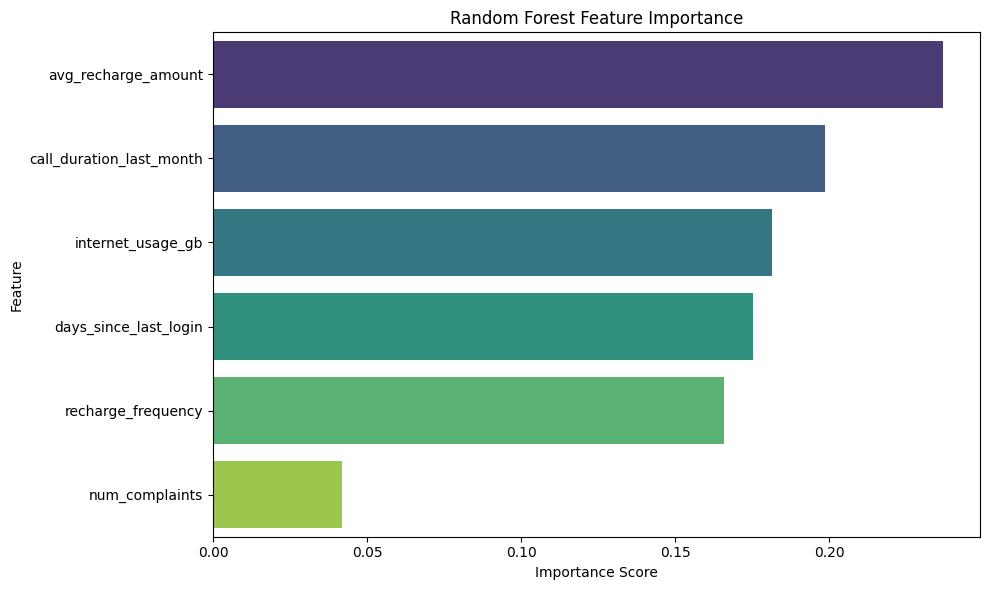

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
